In [1]:
# import some libraries we'll need
import numpy as np
from matplotlib import pyplot as plt
import torch

C:\Users\qraus\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For the following function with 1 input and 1 output:
$f(x) = x^2 +\sin(x)$
* Write a formula for $\frac{df}{dx}$ in a markdown cell
* Plot $f(x)$ and $\frac{df}{dx}$ as functions of $x$, evaluated in increments of 0.01 from $x=-5$ to $x=5$
* Verify that your formula is correct by comparing the calculated derivative to the finite difference approximation $\frac{df}{dx} = \frac{f(x + h) - f(x)}{h}$, using a small value of $h$ (try 1e-6 or 1e-7). Plot this approximate derivative for the same values of $x$

$\frac{df}{dx} = 2x + cos(x)$

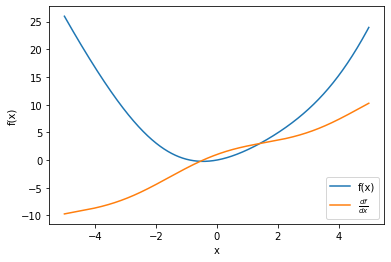

In [ ]:
h = 1e-7
x = np.arange(-5,5,0.01)

f = x**2 + np.sin(x)
df = 2*x + np.cos(x)

plt.plot(x,f, label='f(x)')
plt.plot(x,df, label='$\\frac{d f}{dx}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

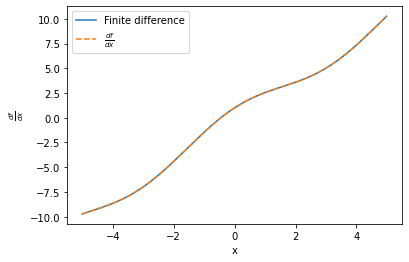

In [ ]:
findiff= (((x+h)**2+np.sin(x+h))-(x**2+np.sin(x)))/h
plt.plot(x,findiff, label='Finite difference')
plt.plot(x,df, '--', label='$\\frac{d f}{dx}$')
plt.xlabel('x')
plt.ylabel('$\\frac{d f}{dx}$')
plt.legend()
plt.show()

Now let's use $f(x) = x_1^2 - x_1x_2$, with 2 inputs and 1 output
* Again find a formula for the row vector $\frac{df}{dx}$
* Randomly generate some 2D points with $0 < x_1, x_2 < 1$. For each point, calculate $\frac{df}{dx}$, and compare to finite difference approximations of $\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}$.

$ \left(\begin{array}{c} \frac{df}{dx_{1}}  \\ \frac{df}{dx_{2}}  \end{array}\right) = \left(\begin{array}{c} 2 x_{1} - x_{2} \\ -x_{1} \end{array}\right) $



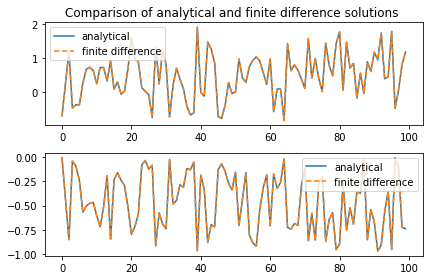

In [ ]:
x = np.random.rand(100,2)
def f(x1,x2):
  f = x1**2 - x1*x2
  return f

df = np.stack((2*x[:,0]-x[:,1], -x[:,0]),axis = 1)
dfin = np.stack(((f(x[:,0]+h,x[:,1])-f(x[:,0],x[:,1]))/h, (f(x[:,0],x[:,1]+h)-f(x[:,0],x[:,1]))/h), axis=1)




plt.subplot(211)
plt.plot(df[:,0], label = 'analytical')  
plt.plot(dfin[:,0], '--', label = 'finite difference')
plt.title('Comparison of analytical and finite difference solutions ')
plt.legend()
plt.subplot(212)
plt.plot(df[:,1], label = 'analytical') 
plt.plot(dfin[:,1], '--', label = 'finite difference')
plt.legend()
plt.tight_layout()
plt.show()

For $x \in \mathbb R^2$, let's define

$$
y = f(x) = \left[\begin{array}{c} x_1^2 \\ 2x_2 - 0.1x_1\end{array}\right]
\\
z = g(y) = \left[\begin{array}{c}\frac{y_1}{y_2} \\ \sqrt{y_1^2 + y_2^2 }\end{array}\right]
$$

* For $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$, calculate $y, z$
* Calculate the $2\times 2$ matrices $\frac{df(x)}{dx}$ and $\frac{dg(y)}{dy}$ for this choice of $x$.
* Write out $z=g(f(x))$ as a function of $x$, eliminating $y$. Calculate $\frac{dz}{dx}$ as a formula, then evaluate that formula for $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$.
* For $x = \left[\begin{array}{c}1 \\ 1\end{array}\right]$, use the chain rule to compute $\frac{dz}{dx}$ as a product of two $2\times 2$ matrices, and compare the result to direct calculation without the chain rule.

$ z = g(f(x)) = \left(\begin{array}{c}  \frac{x_{1}^{2}}{2x_{2}-0.1x_{1}} \\ \sqrt{ x_{1}^{4} + 4 x_{2}^{2} - 0.4 x_{1} x_{2} + 0.01 x_{1}^{2}  }  \end{array}\right) $

In [ ]:
# calculate df/dx and dg/dy
x = np.array([1,1])
y = np.array([(x[0]**2),(2*x[0]-0.1*x[1])])
z2 = np.array([y[0]/y[1],np.sqrt(y[0]**2+y[1]**2)])
zx = [x[0]*2/(2*x[1]-0.1*x[0]),np.sqrt((x[0]**2)**2)+((2*x[0]-0.1*x[1]))**2]
np.shape(y)
df = [[2*x[0],0],[-0.1,2]]
dg = [[1/y[1],-y[0]/y[1]**2],
      [y[0]/np.sqrt(y[0]**2+y[1]**2),y[1]/np.sqrt(y[0]**2+y[1]**2)]]


In [ ]:
# use chain rule to compute dz/dx
dzx = [[(0.1*x[0]**2+2*x[0]*(-0.1*x[0]+2*x[1]))/(-0.1*x[0]+2*x[1])**2  ,-2*x[0]**2/(2*x[1]-0.1*x[0])**2 ],
       [2*(x[0]**3+0.005*x[0]-0.1*x[1])/np.sqrt(x[0]**4+(2*x[1]-0.1*x[0])**2)
       ,(2*(2*x[1]-0.1*x[0]))/np.sqrt((x[0]**4+(2*x[1]-0.1*x[0])**2))]]
print(dzx)


[[1.0803324099722993, -0.554016620498615], [0.8430010434270464, 1.769836444763965]]


In [ ]:
res = np.dot(dg,df)
res

array([[ 1.08033241, -0.55401662],
       [ 0.84300104,  1.76983644]])

The results are identical.

Suppose we have a neural network with two inputs, two hidden layers of 8 units each, ReLU activations (except for $\hat y = f_\text{out}(h_L)$) and one output.

* Write an algorithm using python to compute the NN output $\hat y$ given the input and the free parameters (weights and biases)
* Write an algorithm to compute derivatives of the least squares loss $(y - \hat y)^2$ with respect to all free parameters of the NN. This should be a python function that takes the free parameters, NN inputs $x$ and NN training targets $y$ as its own inputs.
* **Difficult problem, skip for now if you get stuck**: Extend your derivative computation algorithm to work with any number of hidden layers, all of which can have different numbers of hidden units.

In [ ]:
inputs = np.ones((1,2))
target = np.ones((1,1))

W1 = np.random.randn(2,8) #input to first layer
b1 = np.zeros((1, 8))
W2 = np.random.randn(8,8) #first layer to second
b2 = np.zeros((1, 8))
W3 = np.random.randn(8,1) #second layer to output
b3 = np.zeros((1))

weights = [W1,W2,W3]
bias = [b1,b2,b3]

h1 = np.maximum(np.matmul(inputs, W1)+b1,0) #ReLu
h2 = np.maximum(np.matmul(h1,W2)+b2,0) #ReLu
output = np.matmul(h2,W3)+b3
layers =[h1,h2,output]

def reluDeriv(x): #derivative of ReLu activation 
  x[x<=0] = 0
  x[x>0] = 1
  return x

def backprop(inputs, weights, biases, target, layers, n_layers, n_units):
  dhl = np.zeros(shape=(n_layers, n_units))
  dbl = np.zeros(shape=(n_layers,n_units))
  dwl = np.zeros(shape=(n_layers,n_units))
  for j in reversed(range(1,n_layers)):
    if j == n_layers-1:
      dhl[j] = (-2*np.dot((target-layers[j][0]),weights[j].T)) # derivative with respect to hidden layer for output
      dbl[j] = np.dot(dhl[j],reluDeriv(np.dot(layers[j-1][0],weights[j])+weights[j])) # derivative with respect to bias for output
      dwl[j] = np.dot(dbl[j],layers[j-1][0].T )# derivative with respect to weight for output
    else:
      dhl[j] = np.dot(dhl[j+1],reluDeriv(np.dot(layers[j][0],weights[j+1])+bias[j+1])*weights[j+1]) # derivative with respect to hidden layer
      dbl[j] = np.dot(dhl[j],reluDeriv(np.dot(layers[j-1][0].T,weights[j])+bias[j].T)) # derivative with respect to bias
      dwl[j] = np.dot(dhl[j],reluDeriv(np.dot(layers[j-1][0],weights[j])+bias[j].T)*layers[j-1][0].T) # derivative with respect to weight
  return dhl, dbl, dwl

dhl, dbl, dwl = backprop(inputs,weights, bias, target, layers, 3, 8)

y = np.ones(1)

e = (y - output)**2

In [ ]:
# number of different layers
def hidden_layer(input,w,b):
  h =  np.maximum(np.matmul(input, w)+b,0) 
  return h

def output (h,w,b):
  out =  np.matmul(h,w)+b
  return out


def alg(input, weights, biases, target, layers, n_layers, n_units):
   layers = np.zeros(shape=(n_layers, n_units))
   for i in range(n_layers-1):
     h = hidden_layer(input,weights[i],biases[i])
     input = h
     layers[i] = input
   out = output(h.T, weights[n_layers-1].T,biases[n_layers-1])  

   dhl, dbl, dwl = backprop(input,weights, bias, target, layers, n_layers, n_units)
   e = (target-out)**1




In [ ]:
n_layers = 3
n_units = 8
alg(inputs, weights, bias, target, layers, n_layers, n_units)

We'll now download a data file and extract 3 variables. Each is a NumPy array:
* 'y' contains monthly values of the [Nino 3.4 ENSO index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni), describing the [El Nino Southern Oscillation](https://en.wikipedia.org/wiki/El_Ni%C3%B1o%E2%80%93Southern_Oscillation) over time.
* `x` contains empirical orthogonal function coefficients that describe the ocean temperature at the sea surface and the depth average over the top 300 meters, in the Indo-Pacific, North-Pacific and Atlantic regions. Essentially, the numbers in each row of $x$ summarize temperatures in the upper ocean across the globe. For details of how these are calculated, you can consult [this paper](https://www.nature.com/articles/s41586-019-1559-7) by Ham et al. Each row of `x` describes the ocean state 2 months before the corresponding element of `y`.
* `t` contains the time in months since Jan. 1 1970 for each value of `y`. We can use this for plotting results but it won't appear in our calculations otherwise.

In [ ]:
# library for downloading files from google drive.
!pip install gdown  

# download the data
!gdown https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA
To: /content/enso_and_pca.npz
100% 242k/242k [00:00<00:00, 64.2MB/s]


In [2]:
# load the data
with np.load('./data/enso_and_pca.npz') as data:
    t, x, y = data['t'], data['x'], data['y']


Normalize `y` and each column of `x` so they all have a mean of zero and a standard deviation of one. Keep track of what you've done, so you can convert your predictions back into original data units later on if needed.

In [3]:
y_norm = (y-np.mean(y))/np.std(y)
x_norm = np.copy(x)

for i in range(len(x[0,:])):
    x_norm[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])

print(np.std(y_norm))
print(np.std(x_norm[0,:]))


1.0
1.2553401


Last time we wrote a loop by hand to cycle over the data. However, pytorch provides great utilities to do this for us, which will let us focus on what's new in each lesson instead. In particular, we're going to use the PyTorch Dataset and DataLoader classes.

In [4]:
from torch.utils.data import TensorDataset, DataLoader

# create PyTorch tensors for our inputs and target outputs
xt = torch.tensor(x_norm, requires_grad = True)
yt = torch.tensor(y_norm, requires_grad = True)

# use the first 1104 time points as training data
xt_train, yt_train = xt[:1104], yt[:1104]

# save the remaining data for testing
xt_test, yt_test = xt[1104:], yt[1104:]

dataset = TensorDataset(xt_train, yt_train)  # combine the inputs and outputs into a PyTorch Dataset object
# create a dataloader to serve up batches of 8 data point for training
data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

Now let's get the first 'batch' of data from the dataloader, and see what it looks like.

In [5]:
for x_batch, y_batch in data_loader:
    print('shape of x_batch: {0}'.format(x_batch.shape) )
    print('shape of y_batch: {0}'.format(y_batch.shape) )  
    break  # if we didn't have this line, the for loop would cycle through all the data

shape of x_batch: torch.Size([8, 46])
shape of y_batch: torch.Size([8])


Now use a for loop, iterating over batches from the data loader, to fit a linear regression $\hat y = x\cdot \beta$ with least squares loss, by stochastic gradient descent. Refer back to the code you wrote from the last set of exercises for guidance (and feel free to copy-paste from your own previous homework).
* Add an extra column of ones to `x` to incorporate a constant term
* Don't forget to set `requires_grad = True` when initializing `beta`
* Choose how to initialize $\beta$. All zeros? Random? Does it make much of a difference here?
* As before, don't forget to use `with torch.no_grad():` when updating parameters
* Store the loss at each iteration of the loop.
* Does the loss decrease on the training data? Do you get a positive correlation between $y$ and $\hat y$ at the end on the training data?
* See if you can get a better result by adjusting the initialization of free parameters or the learning rate

In [6]:
def stoch(data_loader, beta,LR):
    loss_l = np.zeros(1)
    beta_l = np.zeros(100)
    for i in range (0,100):
        for x_batch, y_batch in data_loader:
            ones = torch.ones(8, 1) 
            x_new = torch.cat((x_batch,ones), 1) #add an extra column of ones for constant term
            yhat = torch.mm(beta,x_new.T) 
            loss = torch.sum((y_batch - yhat)**2)
            loss.backward()
            with torch.no_grad():
                beta -= beta.grad * LR
                beta.grad.zero_()
            loss_l = np.append(loss_l, loss.detach().numpy())
        beta_l[i] = beta[0,0].detach().numpy()
    return loss_l, beta_l, beta

LR = 1e-4
beta = torch.zeros((1,47), requires_grad = True) #initialise beta 
loss_l, beta_l, beta= stoch(data_loader,beta,LR)


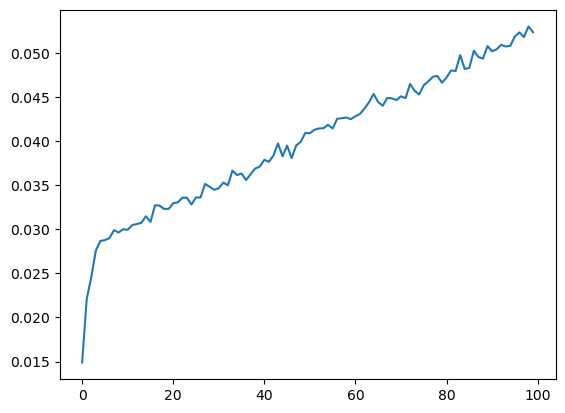

In [7]:
plt.plot(beta_l)

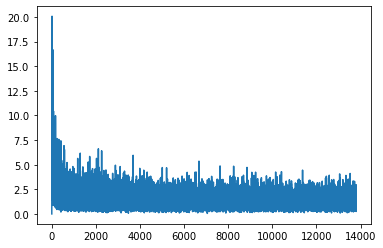

In [ ]:
plt.plot(loss_l)

In [ ]:
#initialise beta randomly

beta_rand= torch.rand((1,47), requires_grad=True)
loss_r, beta_r, betar = stoch(data_loader,beta_rand,LR)

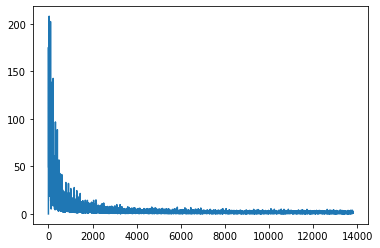

In [ ]:
plt.plot(loss_r)

The loss does decrease in the training data. When initialising with random numbers the loss for the first iterations is higher compared to the initialisation with zero.


In [ ]:
#correlation
beta_corr = beta.detach().numpy()
yhat = np.matmul(beta_corr[:,:-1], x_norm.T)
corr = np.corrcoef(yhat[0,:],y_norm[:])
corr

array([[1.        , 0.91986854],
       [0.91986854, 1.        ]])

The correlation between the normalised x values and the output yhat is approximatepl 92%, over the entire dataset.

In [ ]:
yhat_train = np.matmul(beta_corr[:,:-1], xt_train.detach().numpy().T)
corr_train = np.corrcoef(yhat_train[0,:],yt_train.detach().numpy()[:])
corr_train

array([[1.        , 0.92317757],
       [0.92317757, 1.        ]])

The correlation for the training dataset is slightly higher compared to the entire dataset, but also at around 92%.

In [ ]:
yhat_test = np.matmul(beta_corr[:,:-1], xt_test.detach().numpy().T)
corr_test = np.corrcoef(yhat_test[0,:],yt_test.detach().numpy()[:])
corr_test

array([[1.        , 0.89245835],
       [0.89245835, 1.        ]])

The correlation between the normalised x values and the output for the testing dataset is slightly lower  compared to the entire dataset at approximately 89%.

In [ ]:
#Use random beta
beta_r_corr = betar.detach().numpy()
yhat_rand = np.matmul(beta_r_corr[:,:-1],x_norm.T)
corr_rand = np.corrcoef(yhat_rand[0,:],y_norm[:])
corr_rand

array([[1.        , 0.91331008],
       [0.91331008, 1.        ]])

For the random initialisation of beta the correlation lies also at approximately 91%

Now repeat the process, but instead of a linear model we'll use a neural network with two hidden layers of 32 units each, and the ReLU activation function $\phi(z) = \max(0, z)$. Again we'll use least squares loss and a batch size of 8.

**Don't** use PyTorch's built-in classes for this just yet. Instead:
* Define tensors of the correct size and data type (check `x.dtype`) for each variable containing free parameters (weights and biases) of your neural network. Remember to set `requires_grad = True` where needed.
* For each batch of data, compute the hidden state activations $h_1$ as a function of $W_1, b_1, x$
* Then compute $h_2$, $\hat y$ and $e=\ell(y, \hat y)$.
* Call `e.backward()` to compute derivatives of $e$ with respect to the free variables of your neural network, using backward-mode differentiation.
* Now update all free parameters based on the computed derivatives and the learning rate, just as you did for the linear regression example. Remember to use `with torch.no_grad():`
* Plot the convergence of the loss function over iterations. Are you getting a better fit than with the linear regression?
* How did you initialize? Does it make a difference now?

In [ ]:
W1 = torch.tensor(np.random.rand(32,46)*0.1, requires_grad = True)
W2 = torch.tensor(np.random.rand(32,32)*0.1, requires_grad = True)
W3 = torch.tensor(np.random.rand(1,32)*0.1, requires_grad = True)
b1 = torch.tensor(np.random.rand(32,1)*0.1, requires_grad = True)
b2 = torch.tensor(np.random.rand(32,1)*0.1, requires_grad = True)
b3 = torch.tensor(np.random.rand(1,1)*0.1, requires_grad = True)
LR = 1e-4
loss = np.zeros((500))
Beta = np.zeros((500))

def NN(LR,W1,W2,W3,h1,h2,h3,b1,b2,b3,data_loader):
  for j in range (0,500):
      for x_batch, y_batch in data_loader:
        h1 = torch.maximum(torch.zeros(1),torch.add(torch.mm(W1.float(),x_batch.T.float()),b1))
        h2 = torch.maximum(torch.zeros(1),torch.add(torch.mm(W2.float(),h1.float()),b2))
        output =  torch.add(torch.mm(W3.float(),h2.float()),b3)
        e = torch.sum((y_batch.T-output)**2)
        e.backward()
        with torch.no_grad():
            W1 -= W1.grad * LR
            W1.grad.zero_()
            W2 -= W2.grad * LR
            W2.grad.zero_()
            W3 -= W3.grad * LR
            W3.grad.zero_()
            b1 -= b1.grad * LR
            b1.grad.zero_()
            b2 -= b2.grad * LR
            b2.grad.zero_()
            b3 -= b3.grad * LR
            b3.grad.zero_()
      loss[j] = e.detach().numpy()
  return loss, W1, W2, W3, b1,b2,b3  

loss, W1, W2, W3, b1,b2,b3  = NN(LR,W1,W2,W3,h1,h2,output,b1,b2,b3,data_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)


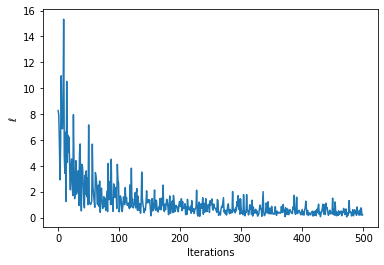

In [ ]:
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('$\ell$')
plt.show()

In [ ]:
W1_z = torch.tensor(np.zeros((32,46))*0.1, requires_grad = True)
W2_z = torch.tensor(np.zeros((32,32))*0.1, requires_grad = True)
W3_z = torch.tensor(np.zeros((1,32))*0.1, requires_grad = True)
b1_z = torch.tensor(np.zeros((32,1))*0.1, requires_grad = True)
b2_z = torch.tensor(np.zeros((32,1))*0.1, requires_grad = True)
b3_z = torch.tensor(np.zeros((1,1))*0.1, requires_grad = True)
LR = 0.001
loss = np.zeros((500))
Beta = np.zeros((500)) 

loss_z, W1_z, W2_z, W3_z, b1_z,b2_z,b3_z  = NN(LR,W1_z,W2_z,W3_z,h1,h2,output,b1_z,b2_z,b3_z,data_loader)

Text(0, 0.5, '$\\ell$')

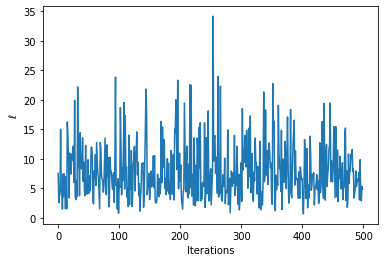

In [ ]:
plt.plot(loss_z)
plt.xlabel('Iterations')
plt.ylabel('$\ell$')

The loss does not converge anymore, when initialising with zeros

In [ ]:
h1_nn_train = torch.maximum(torch.zeros(1),torch.add(torch.mm(W1.float(),xt_train.T.float()),b1))
h2_nn_train = torch.maximum(torch.zeros(1),torch.add(torch.mm(W2.float(),h1_nn_train.float()),b2))
out_nn_train = torch.add(torch.mm(W3.float(),h2_nn_train.float()),b3)


h1_nn_test = torch.maximum(torch.zeros(1),torch.add(torch.mm(W1.float(),xt_test.T.float()),b1))
h2_nn_test = torch.maximum(torch.zeros(1),torch.add(torch.mm(W2.float(),h1_nn_test.float()),b2))
out_nn_test = torch.add(torch.mm(W3.float(),h2_nn_test.float()),b3)

h1_nn_all = torch.maximum(torch.zeros(1),torch.add(torch.mm(W1.float(),xt.T.float()),b1))
h2_nn_all = torch.maximum(torch.zeros(1),torch.add(torch.mm(W2.float(),h1_nn_all.float()),b2))
out_nn_all = torch.add(torch.mm(W3.float(),h2_nn_all.float()),b3)



Now plot the target ENSO 3.4 index values $y$ against the predictions from the linear regression and the neural network. Clearly mark the boundary between training and testing data.

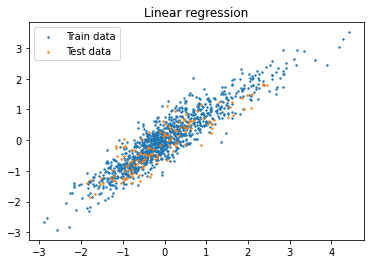

In [ ]:
yt_test_np= yt_test.detach().numpy()
yt_train_np= yt_train.detach().numpy()
xt_train_np= xt_train.detach().numpy()
xt_test_np= xt_test.detach().numpy()

ax1 = plt.scatter(yt_train_np,np.dot(beta_corr[:,:-1],xt_train_np.T), label='Train data', s=2)
ax2 = plt.scatter(yt_test_np,np.dot(beta_corr[:,:-1],xt_test_np.T), label='Test data',s=2)
plt.legend()
plt.title('Linear regression')
plt.show()

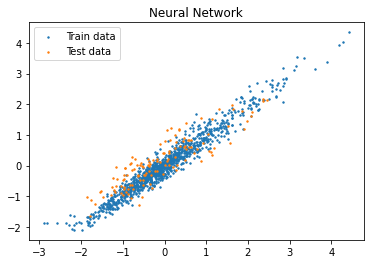

In [ ]:
out_nn_train_np= out_nn_train.detach().numpy()
out_nn_test_np= out_nn_test.detach().numpy()

ax1 = plt.scatter(y_norm[:1104],out_nn_train_np, label='Train data',s=2)
ax2 = plt.scatter(yt_test_np, out_nn_test_np, label='Test data',s=2)
plt.legend()
plt.title('Neural Network')
plt.show()

The test and training data seem to match pretty well.

What are mean square errors for the NN and linear regression, in original data units, on the testing and training data? How about Pearson's correlation coefficient?

In [ ]:
#get original data units
x_orig = torch.tensor(x, requires_grad = True)
y_orig = torch.tensor(y, requires_grad = True)
xt_train_orig, yt_train_orig = x_orig[:1104], y_orig[:1104] 
xt_test_orig, yt_test_orig = x_orig[1104:], y_orig[1104:]
dataset_orig = TensorDataset(xt_train_orig, yt_train_orig)  
data_loader_orig = DataLoader(dataset_orig, batch_size=8, shuffle=True)
beta_orig = torch.randn((1,47), requires_grad=True)
LR = 1e-6
loss_orig, beta_o, b_o = stoch(data_loader_orig,beta_orig,LR)
x_orig_np = x_orig.detach().numpy()
y_reg_orig = np.matmul(b_o.detach().numpy()[:,:-1],x_orig_np.T)



In [ ]:
# MSE for LR
y_test_np = yt_test.detach().numpy()
y_test_LR = torch.mm(beta[:,:-1],xt_test.T).detach().numpy()
y_train_np = yt_train.detach().numpy()
y_train_LR = torch.mm(beta[:,:-1],xt_train.T).detach().numpy()

MSE_lr_norm = np.sum(y_norm-(np.dot(beta_corr[:,:-1],x_norm.T)))**2/len(y_norm)
MSE_lr_orig = np.sum(y-np.dot(beta_corr[:,:-1],x.T))**2/len(y)
MSE_lr_train =np.sum(yt_train.detach().numpy()-y_train_LR)**2/len(yt_train)
MSE_lr_test = np.sum(yt_test.detach().numpy()-y_test_LR)**2/len(yt_test)
PCC_norm = np.corrcoef(y_norm,np.dot(beta_corr[:,:-1],x_norm.T))
PCC_orig = np.corrcoef(y,np.dot(beta_corr[:,:-1],x.T))
PCC_train = np.corrcoef(yt_train.detach().numpy(),y_train_LR)
PCC_test = np.corrcoef(yt_test.detach().numpy(),y_test_LR)


print('MSE for normalised data', MSE_lr_norm)
print('MSE for original', MSE_lr_orig)
print('MSE for train data', MSE_lr_train)
print('MSE for test data', MSE_lr_test)
print('Pearson correlation coefficient for normalised data',PCC_norm)
print('Pearson correlation coefficient for normalised data',PCC_orig)
print('Pearson correlation coefficient for normalised data',PCC_train)
print('Pearson correlation coefficient for normalised data',PCC_test)


MSE for normalised data 9.559652339803042e-13
MSE for original 1.1480543916902994
MSE for train data 0.09741734211655821
MSE for test data 0.833716727042383
Pearson correlation coefficient for normalised data [[1.         0.91986854]
 [0.91986854 1.        ]]
Pearson correlation coefficient for normalised data [[1.         0.81499983]
 [0.81499983 1.        ]]
Pearson correlation coefficient for normalised data [[1.         0.92317757]
 [0.92317757 1.        ]]
Pearson correlation coefficient for normalised data [[1.         0.89245835]
 [0.89245835 1.        ]]


In [ ]:
#MSE for NN
MSE_NN_norm = np.sum((y_norm - out_nn_all.detach().numpy())**2)/len(y_norm)
MSE_NN_train = np.sum((yt_train.detach().numpy() - out_nn_train.detach().numpy())**2)/len(yt_train)
MSE_NN_test = np.sum((yt_test.detach().numpy() - out_nn_test.detach().numpy())**2)/len(yt_test)
print('MSE for normalised data', MSE_NN_norm)
print('MSE for train data', MSE_NN_train)
print('MSE for test data', MSE_NN_test)

PCC_norm_NN = np.corrcoef(y_norm,out_nn_all.detach().numpy())
PCC_train_NN = np.corrcoef(yt_train.detach().numpy(),out_nn_train.detach().numpy())
PCC_test_NN = np.corrcoef(yt_test.detach().numpy(),out_nn_test.detach().numpy())


print('Pearson correlation coefficient for normalised data',PCC_norm_NN)
print('Pearson correlation coefficient for normalised data',PCC_train_NN)
print('Pearson correlation coefficient for normalised data',PCC_test_NN)

MSE for normalised data 0.07207394943094324
MSE for train data 0.05108672055188621
MSE for test data 0.2516855826284546
Pearson correlation coefficient for normalised data [[1.         0.96412403]
 [0.96412403 1.        ]]
Pearson correlation coefficient for normalised data [[1.         0.97448952]
 [0.97448952 1.        ]]
Pearson correlation coefficient for normalised data [[1.        0.8867029]
 [0.8867029 1.       ]]


Now we'll do the same thing, but defining a python object class for our neural network, and some built-in PyTorch classes:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_inputs=46, n_outputs=1, n_hidden=32):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_inputs, n_hidden)  # 5*5 from image dimension
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_outputs)
     
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

As described in the first two lectures, we are now building our neural net out of composable functions that we can stack together like legos.

PyTorch also lets us iterate in loops over the trainable parameters of the model. Note how `requires_grad` was correctly set by default for the learnable parameters.

In [ ]:
net = Net()
for name, param in net.named_parameters():
    print(f'{name}: requires_grad={param.requires_grad}')

fc1.weight: requires_grad=True
fc1.bias: requires_grad=True
fc2.weight: requires_grad=True
fc2.bias: requires_grad=True
fc3.weight: requires_grad=True
fc3.bias: requires_grad=True


When we use our network object like a function, the input gets passed to the `forward()` method:

In [ ]:
print(net(torch.rand(46)))

tensor([0.1282], grad_fn=<AddBackward0>)


We can also provide it with multiple inputs to process independently:

In [ ]:
print(net(torch.rand(4,46)))

tensor([[0.1631],
        [0.1608],
        [0.1747],
        [0.1306]], grad_fn=<AddmmBackward0>)


Now redo the training loop from before, but now update the parameters using an inner loop over `net.named_parameters` (remember to use `torch.no_grad()` when updating parameters, and to zero out the derivatives after you do so).

Instead of calling `var.grad.zero()` on each trainable variable, we can now also simply call `net.zero_grad()` once.

Look up the default initialization of weights and biases in the `nn.Linear` objects you used.

In [ ]:
print(net.fc1.weight)
print(net.fc2.weight)
print(net.fc3.weight)


Parameter containing:
tensor([[ 0.1353,  0.0552, -0.1077,  ...,  0.0546, -0.0580,  0.1332],
        [ 0.1166,  0.0330,  0.0043,  ..., -0.0963,  0.0235,  0.1163],
        [-0.0360,  0.1078,  0.0240,  ..., -0.0855, -0.0386,  0.0203],
        ...,
        [ 0.0282,  0.0403,  0.0955,  ...,  0.0687,  0.0890, -0.0587],
        [ 0.0041, -0.0422, -0.0137,  ...,  0.1215,  0.0490, -0.1132],
        [ 0.1375,  0.0788,  0.0969,  ..., -0.1167,  0.0030, -0.0129]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0152, -0.1294, -0.1329,  ..., -0.1007,  0.0075,  0.0263],
        [ 0.0909,  0.0474,  0.1635,  ..., -0.1049, -0.1755,  0.0854],
        [ 0.0810,  0.1259, -0.0588,  ...,  0.0047, -0.0313, -0.0581],
        ...,
        [-0.1503, -0.1535, -0.1134,  ..., -0.1694, -0.1098, -0.0991],
        [-0.0767,  0.0874,  0.0717,  ..., -0.0675,  0.0185, -0.1715],
        [ 0.1519,  0.0636,  0.1268,  ...,  0.1712, -0.0372,  0.1714]],
       requires_grad=True)
Parameter containing:
tensor([[-0.

In [ ]:
print(net.fc1.bias)
print(net.fc2.bias)
print(net.fc3.bias)

Parameter containing:
tensor([-0.0526, -0.0195,  0.0195, -0.1292,  0.0640, -0.0472,  0.0226, -0.0605,
        -0.0362, -0.0253,  0.0694, -0.0003,  0.1217, -0.0491, -0.1249,  0.0927,
         0.0809,  0.0269, -0.0732, -0.0464,  0.0506, -0.1160, -0.0655, -0.1143,
        -0.1396, -0.0535, -0.0659,  0.0687, -0.0708,  0.0252, -0.0527, -0.0961],
       requires_grad=True)
Parameter containing:
tensor([ 0.1172,  0.0006, -0.1696, -0.1181,  0.0295,  0.0011,  0.1555, -0.0785,
        -0.1245,  0.1120,  0.1291, -0.0935,  0.0275, -0.0412,  0.1040, -0.0320,
         0.0720,  0.0796, -0.0531, -0.0752,  0.0708,  0.1704,  0.1434,  0.1335,
        -0.1680,  0.1405,  0.1164, -0.0396, -0.1753, -0.1417, -0.1087,  0.1050],
       requires_grad=True)
Parameter containing:
tensor([0.1568], requires_grad=True)


In [ ]:
LR = 1e-4
loss_tr = np.zeros((500))
for i in range(0,500):
    for x_batch, y_batch in data_loader:
        out = net(x_batch)
        e = torch.sum((y_batch.reshape(-1,1) - out)**2)
        e.backward()
        with torch.no_grad():
          for name, param in net.named_parameters():
            param -= param.grad *LR
          net.zero_grad()
    loss_tr[i] = e.detach().numpy()      


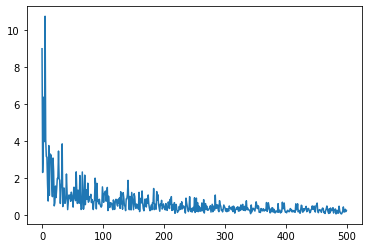

In [ ]:
plt.plot(loss_tr)

Change the `Net()` class above to allow an adjustable number of hidden layers to be specified when initializing the object, and to specify a different number of hidden units for each hidden layer. Can you get better results on the testing data by adjusting this?

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net_adj(nn.Module):
    def __init__(self, n_inputs=46, n_outputs=1, n_hidden=32, n_layers = 7):
        super(Net_adj, self).__init__()

        layers_l = []
        layers_l.append(nn.Linear(n_inputs,n_hidden)) #first layer

        for i in range(n_layers-1): #hidden layers inbetween
           layers_l.append(nn.Linear(n_hidden,n_hidden))

        layers_l.append(nn.Linear(n_hidden, n_outputs)) #output layer

        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.layers = nn.ModuleList(layers_l)

    def forward(self,x):
      x = F.relu(self.layers[0](x))
      for j in range (1,7):
        x = F.relu(self.layers[j](x))
      x = self.layers[-1](x)
      return x

 

In [ ]:
#adjustable hidden layers
net_adj = Net_adj()
LR = 1e-6

loss_tr2 = np.zeros((100))
for i in range(0,100):
    for x_batch, y_batch in data_loader:
        out = net_adj(x_batch)
        e = torch.sum((y_batch.reshape(-1,1) - out)**2)
        e.backward()
        with torch.no_grad():
          for name, param in net_adj.named_parameters():
            param -= param.grad *LR
          net.zero_grad()
    loss_tr2[i] = e.detach().numpy()  

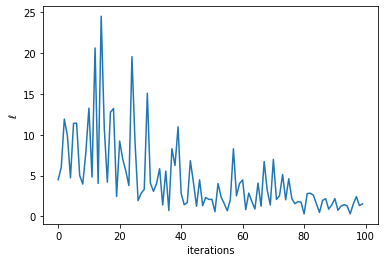

In [ ]:
plt.plot(np.arange(0,100),loss_tr2)
plt.xlabel('iterations')
plt.ylabel('$\ell$')
plt.show()

In [ ]:
#adjustable hiddle layers and units
# I tried to loop through different numbers of units with the layer_size, this is not working, as I cannot get the shapes to match
import torch.nn as nn
import torch.nn.functional as F

class Net_adj2(nn.Module):
    def __init__(self, n_inputs=46, n_outputs=1, n_hidden=32, n_layers = 7):
        super(Net_adj2, self).__init__()
        layer_size = torch.randint(3,10,(7,1)) #different number of units
        layers_l = []
        layers_l.append(nn.Linear(n_inputs,layer_size[0,:])) #first layer


        for i in range(1,n_layers-1): #hidden layers inbetween
           layers_l.append(nn.Linear(layer_size[i,:],layer_size[i-1,:]))

        layers_l.append(nn.Linear(layer_size[-1,:], n_outputs)) #output layer

        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.layers = nn.ModuleList(layers_l)

    def forward(self,x):
      x = F.relu(self.layers[0](x))
      for j in range (1,7):
        x = F.relu(self.layers[j](x))
      x = self.layers[-1](x)
      return x



In [ ]:

net_adj2 = Net_adj2()
LR = 1e-6

loss_tr2 = np.zeros((100))
for i in range(0,100):
    for x_batch, y_batch in data_loader:
        out = net_adj2(x_batch)
        e = torch.sum((y_batch.reshape(-1,1) - out)**2)
        e.backward()
        with torch.no_grad():
          for name, param in net_adj.named_parameters():
            param -= param.grad *LR
          net.zero_grad()
    loss_tr2[i] = e.detach().numpy()  

RuntimeError: ignored